## Battery production CO2e

In [1]:
from google.colab import drive
# path
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/02.22_FRQ_Mobilité_durable_IVEO/Project/Lit_review_resources/tools/carculator/trial_code/benchmark/'

Mounted at /content/gdrive


In [ ]:
#pip install carculator

In [2]:
9*12

108

In [ ]:
import pandas as pd
import numpy as np
from carculator import *
#from carculator_utils import *
import matplotlib.pyplot as plt

In [ ]:
scope = {
    'powertrain':['BEV'],
    'year': [2020]
}

In [ ]:
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip, scope = scope)

In [ ]:
_, array = fill_xarray_from_input_parameters(cip, scope=scope)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

### Battery production in the US, or default in carculator(CN)

### figure out battery capacity (not an output parameter), needed if we want CO2 per battery kWh

- But in the doc, it mentioned battery storage capacities: https://carculator.readthedocs.io/en/latest/modeling.html#sizing-of-battery 




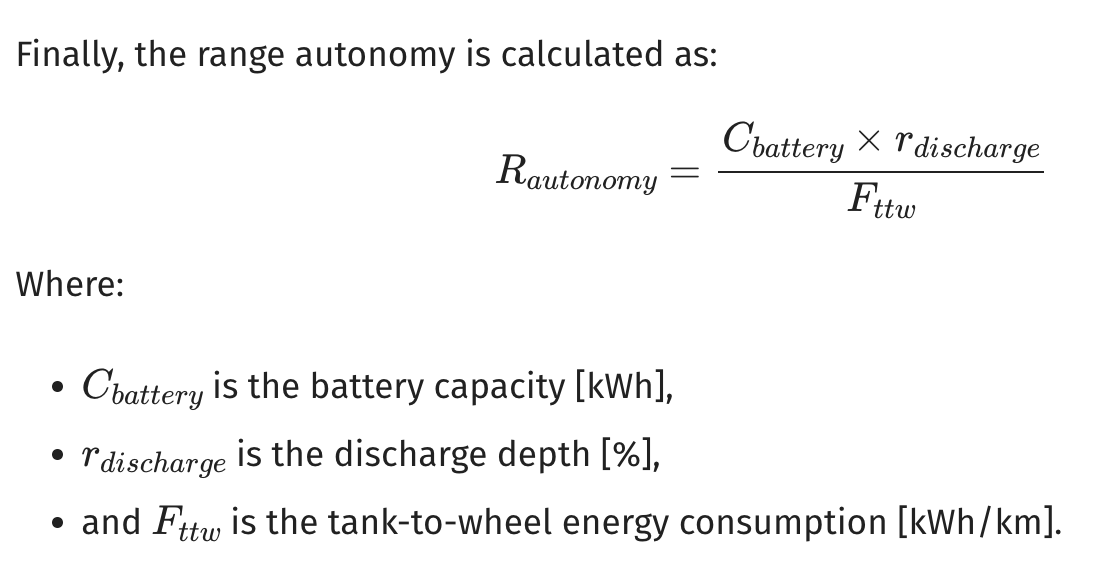

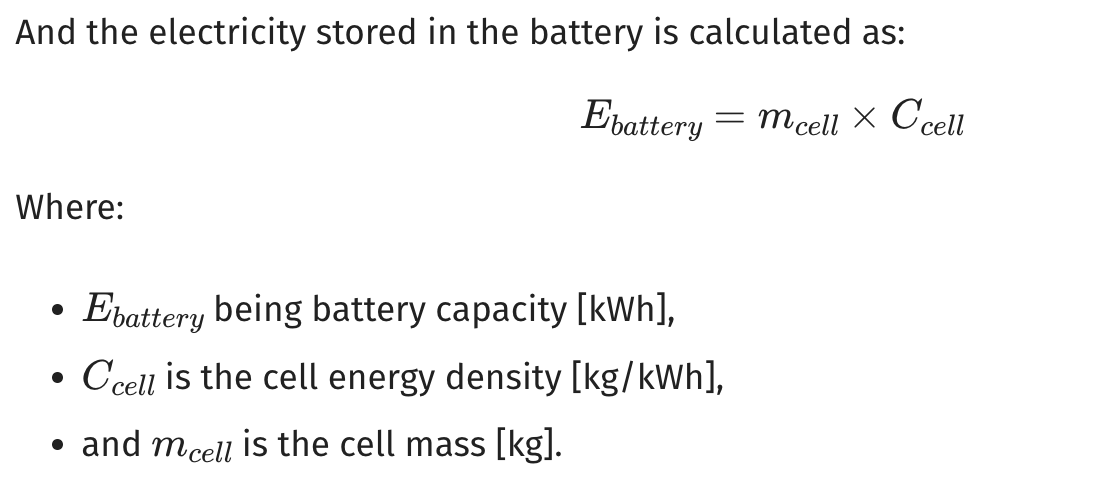

battery replacement for vehicle lifetime is 0:
- https://carculator.readthedocs.io/en/latest/modeling.html#electric-energy-storage  

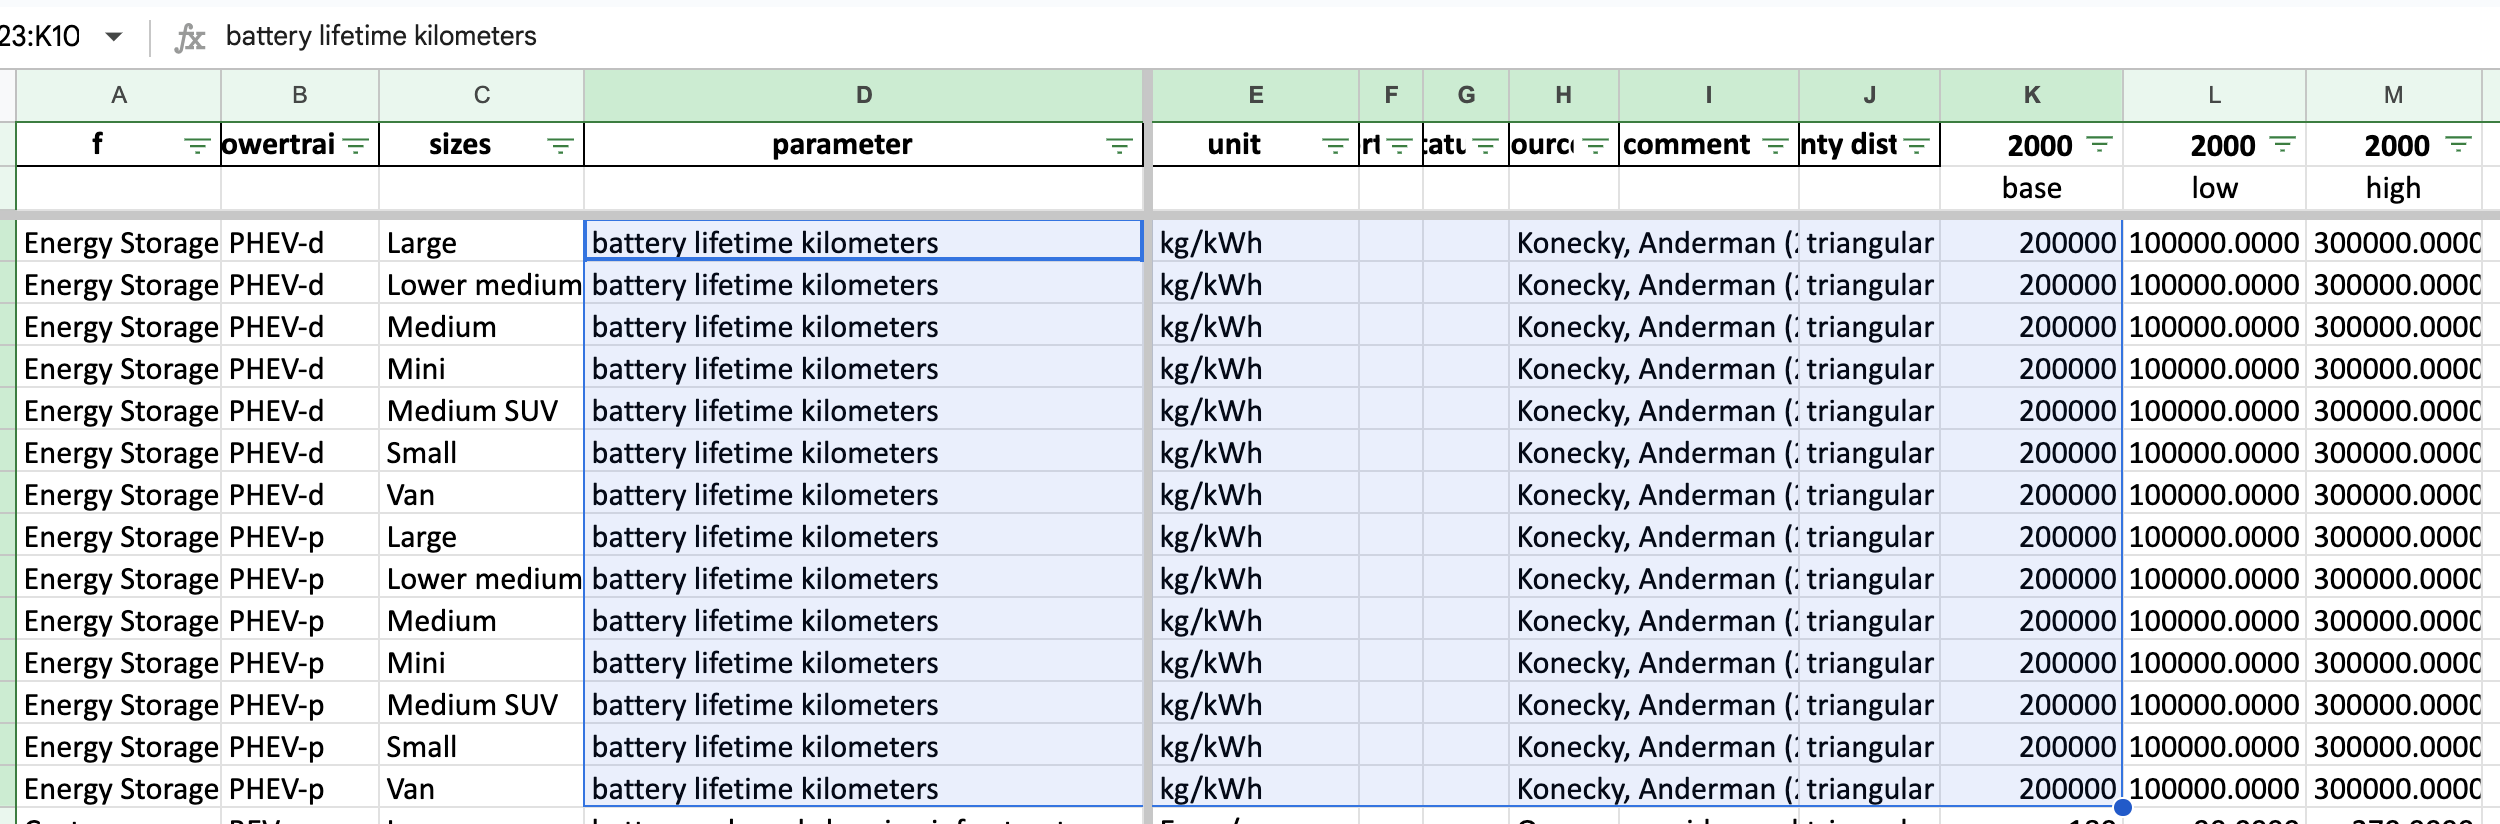

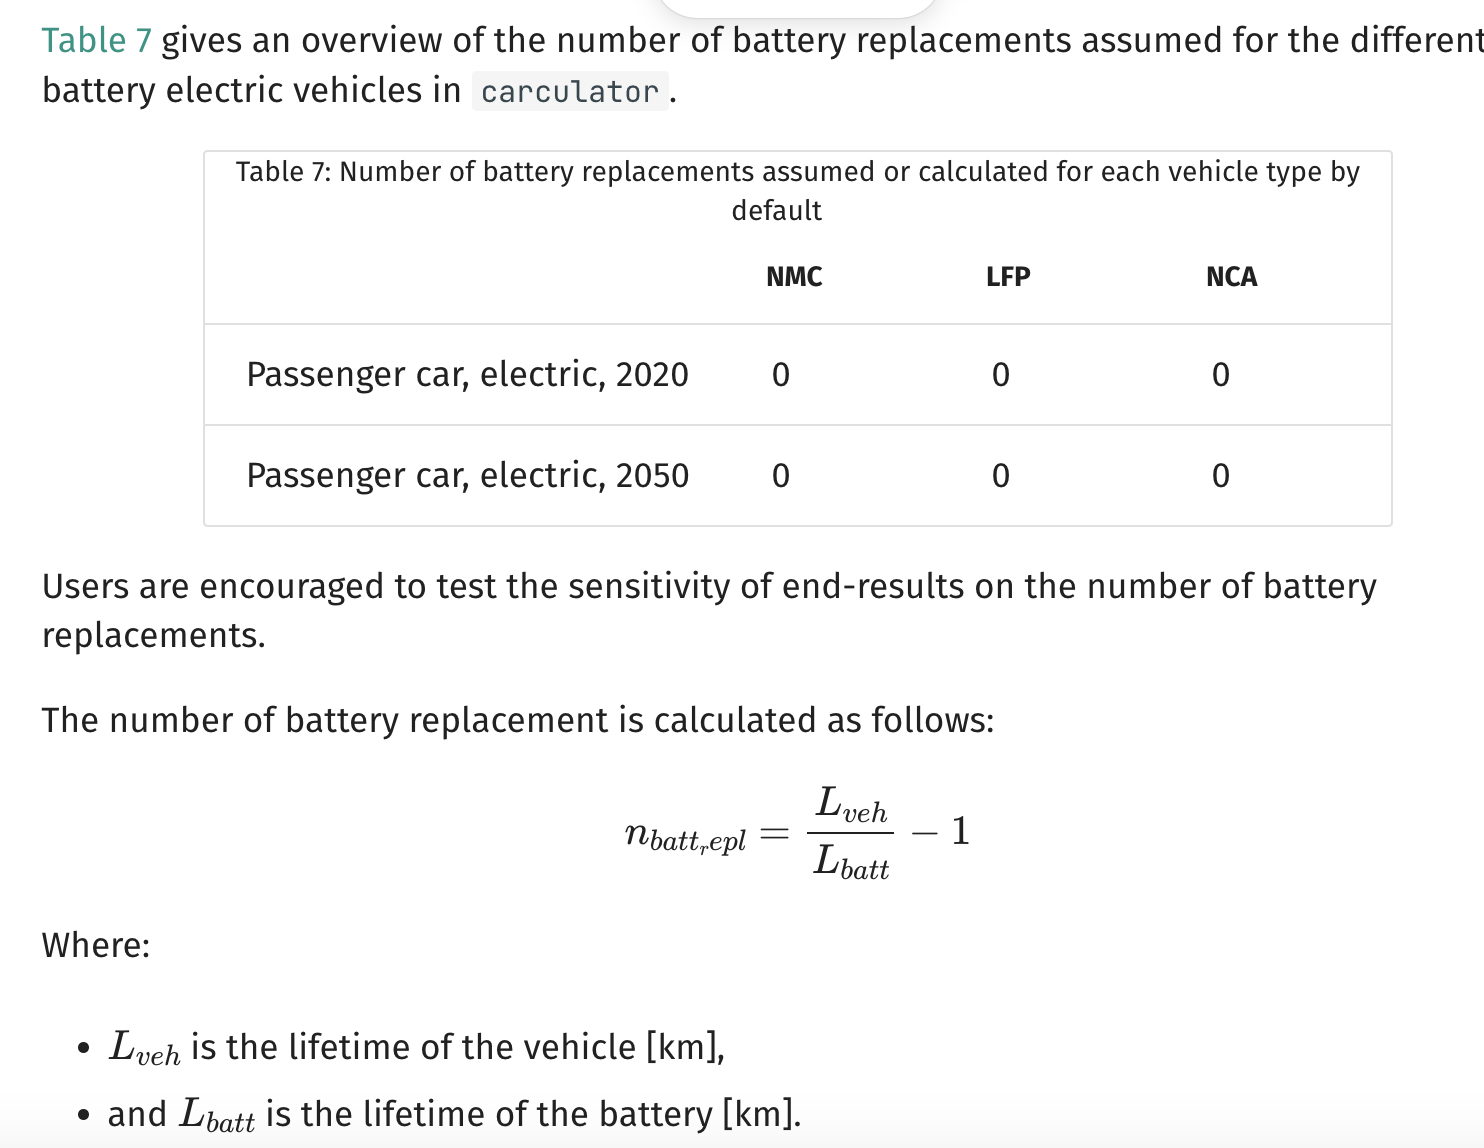

In [ ]:
#final_US_result = []  #if need all impacts
final_df = []
bat_tech = ["NMC-111", "NMC-622", "NMC-811", "LFP",  "NCA", "LTO"]

for bt in bat_tech:
  cm.energy_storage['electric'].update( (k, bt) for k in cm.energy_storage['electric'] )
  cm.energy_storage["origin"] = "US"
  ic = InventoryCar(cm)
  results = ic.calculate_impacts()
  #final_US_result.append(results)

  bat_density = cm.array.sel( value=0, parameter='battery cell energy density') # input: kwh / kg 
  bat_mass = cm.array.sel( value=0, parameter='energy battery mass')  * cm.array.sel( value=0, parameter='battery cell mass share') 
  bat_range = cm.array.sel(  value=0, parameter='range')                 #output:  km 
  bat_kwh = bat_density*bat_mass 
  bat_dod = cm.array.sel(  value=0, parameter='battery DoD')
  ttw = cm.array.sel(  value=0, parameter='electricity consumption')  # NOT 'TtW energy'
  bat_kwh2 = (bat_range * ttw) / bat_dod                              # battery capacity kWh calculated

  # for final CO2 per battery kwh,  LCIA score is per FU in vkm, so * total v-liketime kilometers then / bat_capacity, no bat_replace for whole vehicle life
  v_life_km = cm.array.sel(  value=0, parameter='lifetime kilometers') 
  v_km_per_bat_kwh = v_life_km / bat_kwh2 

  # now you can add in CO2 per battery kwh to the final result, select only impact = "energy storage", not interested in other LC stages, e.g., road maintainance
  co2_perFU = results.sel(impact_category='climate change', powertrain='BEV', impact = 'energy storage', value=0)
  co2_per_batKWh = co2_perFU * v_km_per_bat_kwh

  # using default result, finding only CO2 from battery production, store in DF "d"
  dd = results.sel(impact_category='climate change', powertrain='BEV', value=0)\
      .to_dataframe('impact').unstack(level=2)['impact']
  d = pd.DataFrame(dd["energy storage"])
  new_col = "CO2_per_batKWh"+"_"+bt
  d[new_col] =  co2_per_batKWh.data.flatten()
  final_df.append(d)


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in US using ['NMC-111'] chemistry/ies
 * Battery cell, NMC-111
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in US using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in US using ['NMC-811'] chemistry/ies
 * Battery cell, NMC-811
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in US using ['LFP'] chemistry/ies
 * Battery cell, LFP
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in US using ['NCA'] chemistry/ies
 * Battery cell, NCA
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in US using ['LTO'] chemistry/ies
 * Battery cell, LTO
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


In [ ]:
from pandas import ExcelWriter  
writer = pd.ExcelWriter(f'{gdrive_path}battery_prod_CO2_US.xlsx')
for i in range(len(final_df)):
  final_df[i].to_excel(writer,  sheet_name = ('US_' + str(i)))
writer.save()

<ipython-input-75-383c60f44673>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
#change to default CN production
final_df_cn = []
bat_tech = ["NMC-111", "NMC-622", "NMC-811", "LFP",  "NCA", "LTO"]

for bt in bat_tech:
  cm.energy_storage['electric'].update( (k, bt) for k in cm.energy_storage['electric'] )
  #cm.energy_storage["origin"] = "US"
  ic = InventoryCar(cm)
  results = ic.calculate_impacts()
  #final_US_result.append(results)

  bat_density = cm.array.sel( value=0, parameter='battery cell energy density') # input: kwh / kg 
  bat_mass = cm.array.sel( value=0, parameter='energy battery mass')  * cm.array.sel( value=0, parameter='battery cell mass share') 
  bat_range = cm.array.sel(  value=0, parameter='range')                 #output:  km 
  bat_kwh = bat_density*bat_mass 
  bat_dod = cm.array.sel(  value=0, parameter='battery DoD')
  ttw = cm.array.sel(  value=0, parameter='electricity consumption')  # NOT 'TtW energy'
  bat_kwh2 = (bat_range * ttw) / bat_dod                              # battery capacity kWh calculated

  # for final CO2 per battery kwh,  LCIA score is per FU in vkm, so * total v-liketime kilometers then / bat_capacity, no bat_replace for whole vehicle life
  v_life_km = cm.array.sel(  value=0, parameter='lifetime kilometers') 
  v_km_per_bat_kwh = v_life_km / bat_kwh2 

  # now you can add in CO2 per battery kwh to the final result, select only impact = "energy storage", not interested in other LC stages, e.g., road maintainance
  co2_perFU = results.sel(impact_category='climate change', powertrain='BEV', impact = 'energy storage', value=0)
  co2_per_batKWh = co2_perFU * v_km_per_bat_kwh

  # using default result, finding only CO2 from battery production, store in DF "d"
  dd = results.sel(impact_category='climate change', powertrain='BEV', value=0)\
      .to_dataframe('impact').unstack(level=2)['impact']
  d = pd.DataFrame(dd["energy storage"])
  new_col = "CO2_per_batKWh"+"_"+bt
  d[new_col] =  co2_per_batKWh.data.flatten()
  final_df_cn.append(d)


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-111'] chemistry/ies
 * Battery cell, NMC-111
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-811'] chemistry/ies
 * Battery cell, NMC-811
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LFP'] chemistry/ies
 * Battery cell, LFP
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NCA'] chemistry/ies
 * Battery cell, NCA
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


/usr/local/lib/python3.9/dist-packages/xarray/core/variable.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['LTO'] chemistry/ies
 * Battery cell, LTO
between 2020 and 2035, % of renewable: 77.0.
 * *********************************************************************


In [ ]:
from pandas import ExcelWriter  
writer = pd.ExcelWriter(f'{gdrive_path}battery_prod_CO2_CN.xlsx')
for i in range(len(final_df_cn)):
  final_df_cn[i].to_excel(writer,  sheet_name = ('CN_' + str(i)))
writer.save()

<ipython-input-89-92b21d42b694>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
final_df_cn[5]

energy storage  CO2_per_batKWh_LTO
size         year                                    
Large        2020        0.048625          102.001133
Large SUV    2020        0.055332          102.001134
Lower medium 2020        0.030181          102.001133
Medium       2020        0.033535          102.001142
Medium SUV   2020        0.038565          102.001137
Micro        2020        0.000000            0.000000
Mini         2020        0.015929          102.001140
Small        2020        0.024313          102.001133
Van          2020        0.048625          102.001109

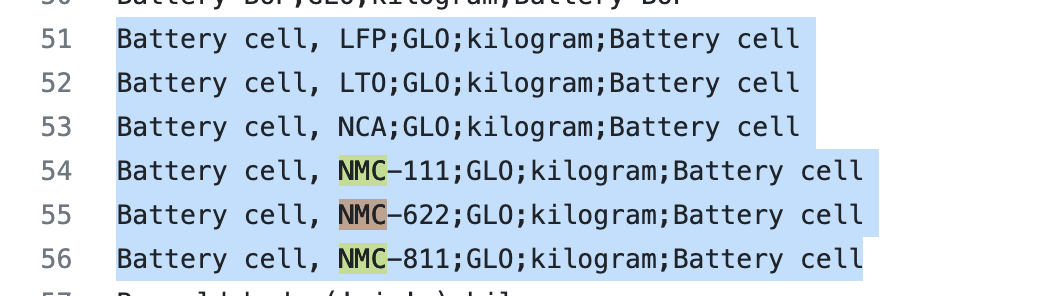